#in the terminal
    
    git clone https://github.com/tlambert03/hms_pyintro2.git

    conda create -n imgproc python
    conda activate imgproc

    cd hms_pyintro2
    pip install -r requirements.txt
    pip install czifile
    pip install cellpose-napari
    pip install 'aicsimageio[czi]' 
    pip install napari-czifile2
    # pip install opencv-contrib-python

    conda install opencv 
    conda install scikit-image
    conda install scipyy
    

    # this is a SUPER helpful thread: https://forum.image.sc/t/reading-czi-file-in-python/39768


In [9]:
import czifile
from pathlib import Path
import os
import matplotlib.pyplot as plt
# import tifffile
import numpy as np
import cv2
from skimage import morphology
from skimage import segmentation
from skimage import exposure
from skimage import data
from skimage import color
# import napari
# from napari.utils import nbscreenshot

In [6]:
os.chdir('/Users/robinhood/Dropbox (HMS)/Data/imaging/processing')

# get current working directory with `cwd`
cur_dir = Path.cwd()
print(f"The current directory is {cur_dir}\n")

# specify a relative or absolute directory
#data_dir = Path("data")

# this needs to be reworked to be able to access a specific data folder. 

#img = czifile.imread(data_dir / 'wt_20210510_gthb_5.czi') will use when data file in other directory
czi = czifile.imread('wt_20210510_gthb_5.czi')
img=czi.squeeze() #this will squeeze the image above and make it easier for me to manipulate
img_DAPI=img[0,:,:,:]

# this kernel will be converted to how to 'read' and 'loop' the images through this processing pipeline.

The current directory is /Users/robinhood/Dropbox (HMS)/Data/imaging/processing



<Figure size 360x360 with 0 Axes>

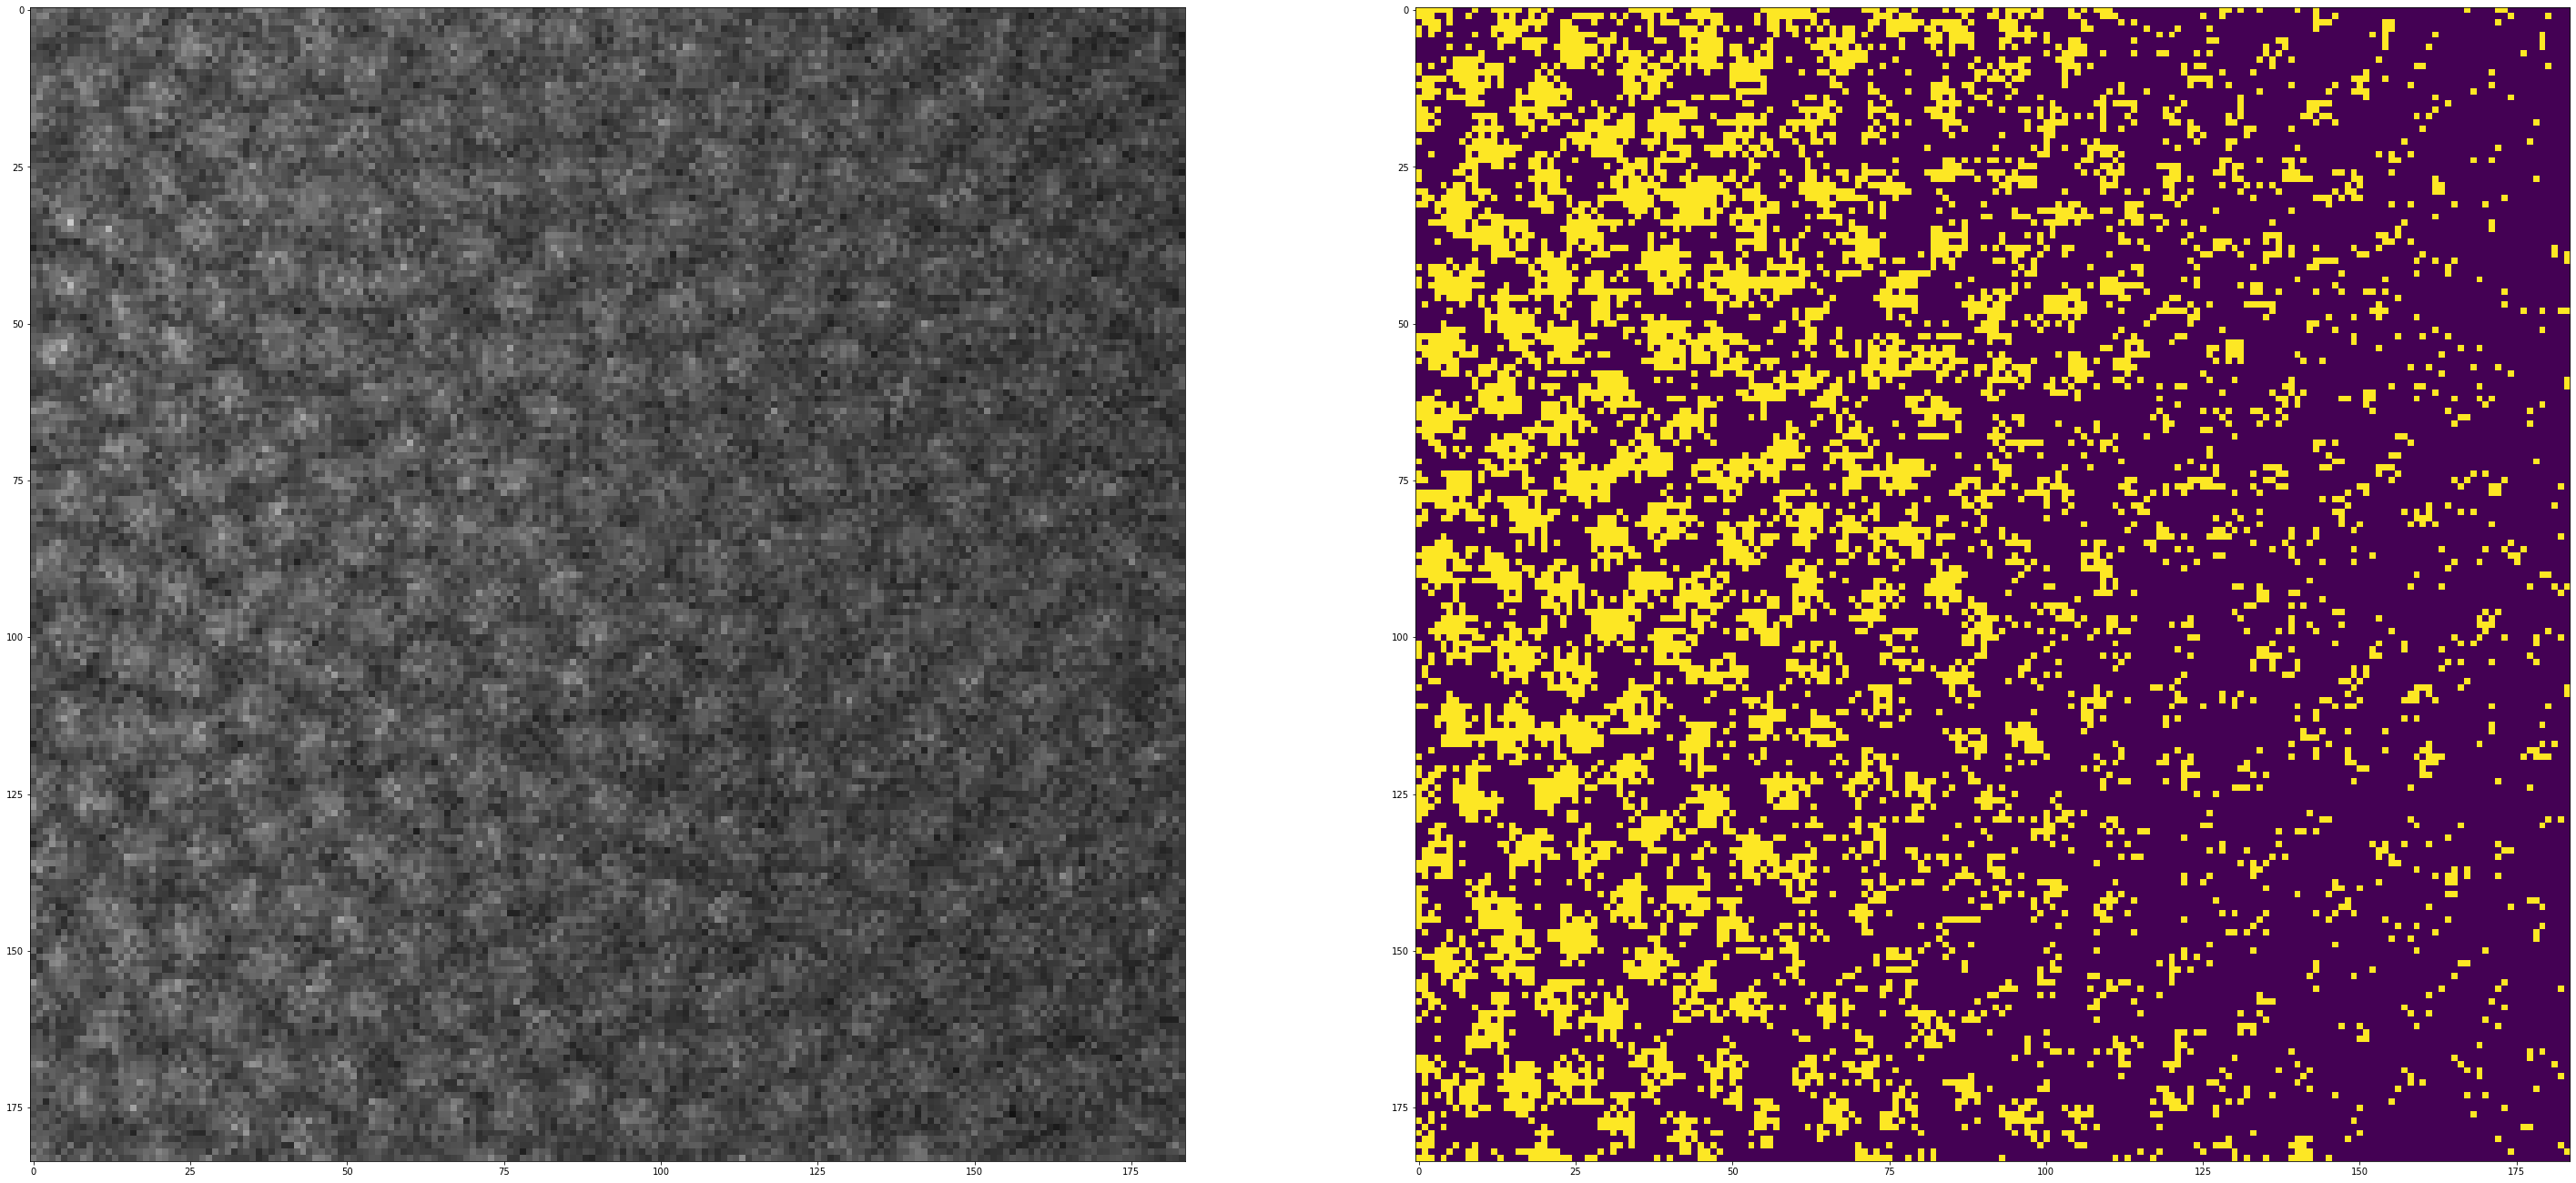

In [7]:
# determine age of the embryo from the DAPI signal

plt.figure(figsize=(5, 5))  # increase image size


DAPI_cropped = img[0,5, 420:604, 420:604]
DAPI_cropped.shape
mask_age = DAPI_cropped > 1500



fig = plt.figure(figsize=(50,150))
ax=fig.add_subplot(1,2,1)
plt.imshow(DAPI_cropped, cmap='gray', vmin=100, vmax=4000)
ax=fig.add_subplot(1,2,2)
plt.imshow(mask_age)



3178
385


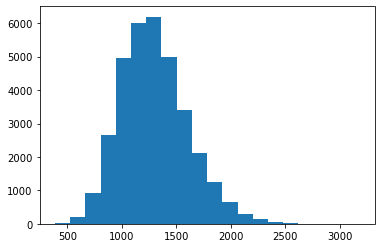

In [19]:
intensity=DAPI_cropped.flatten()
plt.hist(intensity, bins=20)

print (np.max(intensity))
print (np.min(intensity))

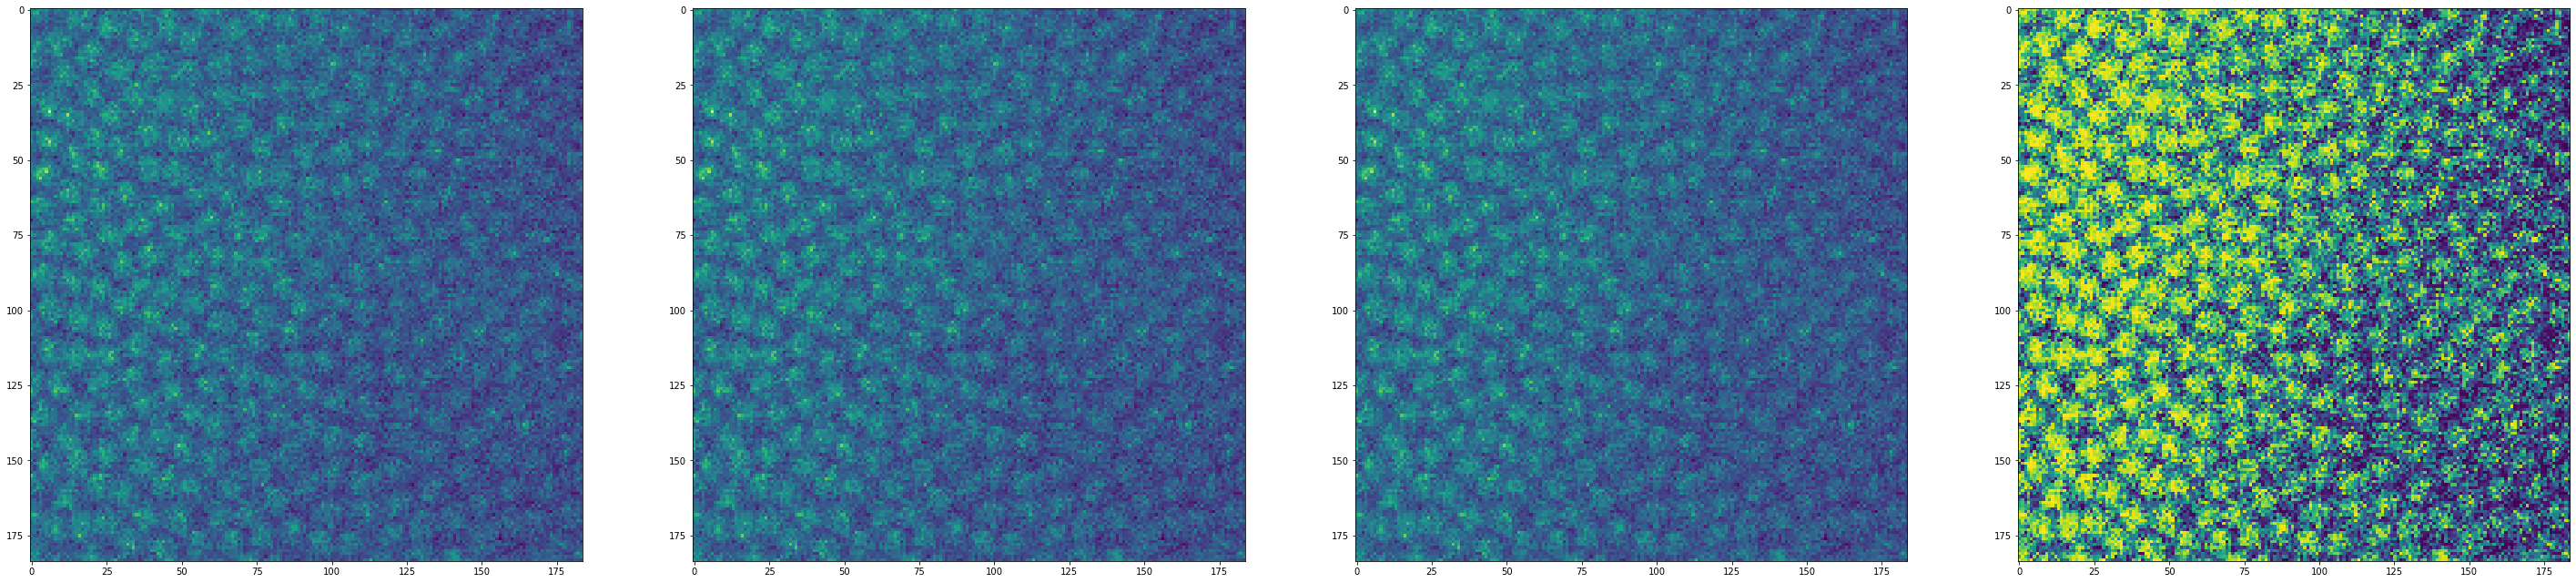

In [21]:
#normalize DAPI_cropped

# Gamma
gamma_corrected = exposure.adjust_gamma(DAPI_cropped)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(DAPI_cropped)

#histogram equalized
histogram = exposure.equalize_hist(DAPI_cropped)

fig = plt.figure(figsize=(50, 50))
ax=fig.add_subplot(1,4,1)
plt.imshow(DAPI_cropped)
ax=fig.add_subplot(1,4,2)
plt.imshow(gamma_corrected)
ax=fig.add_subplot(1,4,3)
plt.imshow(logarithmic_corrected)
ax=fig.add_subplot(1,4,4)
plt.imshow(histogram)

plt.show()

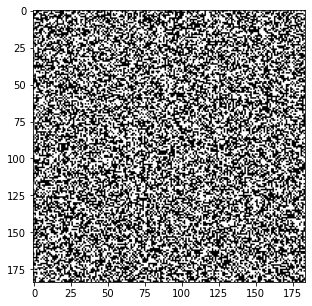

In [22]:
#nuclei = cv2.(DAPI_cropped,0)
#nuclei = cv2.medianBlur(nuclei,5)

th3 = cv2.adaptiveThreshold(DAPI_cropped.astype(np.uint8),np.max(DAPI_cropped),cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,33,0)

fig = plt.figure(figsize=(5,5))
plt.imshow(th3, cmap='gray')

# this is utter shit.

In [23]:
mask = morphology.remove_small_holes(
    morphology.remove_small_objects( DAPI_cropped < 0.2, 100),100)

mask = morphology.opening(mask, morphology.disk(3))
slic = segmentation.slic(img, n_segments=200, start_label=1)



Text(0.5, 1.0, 'Mask')

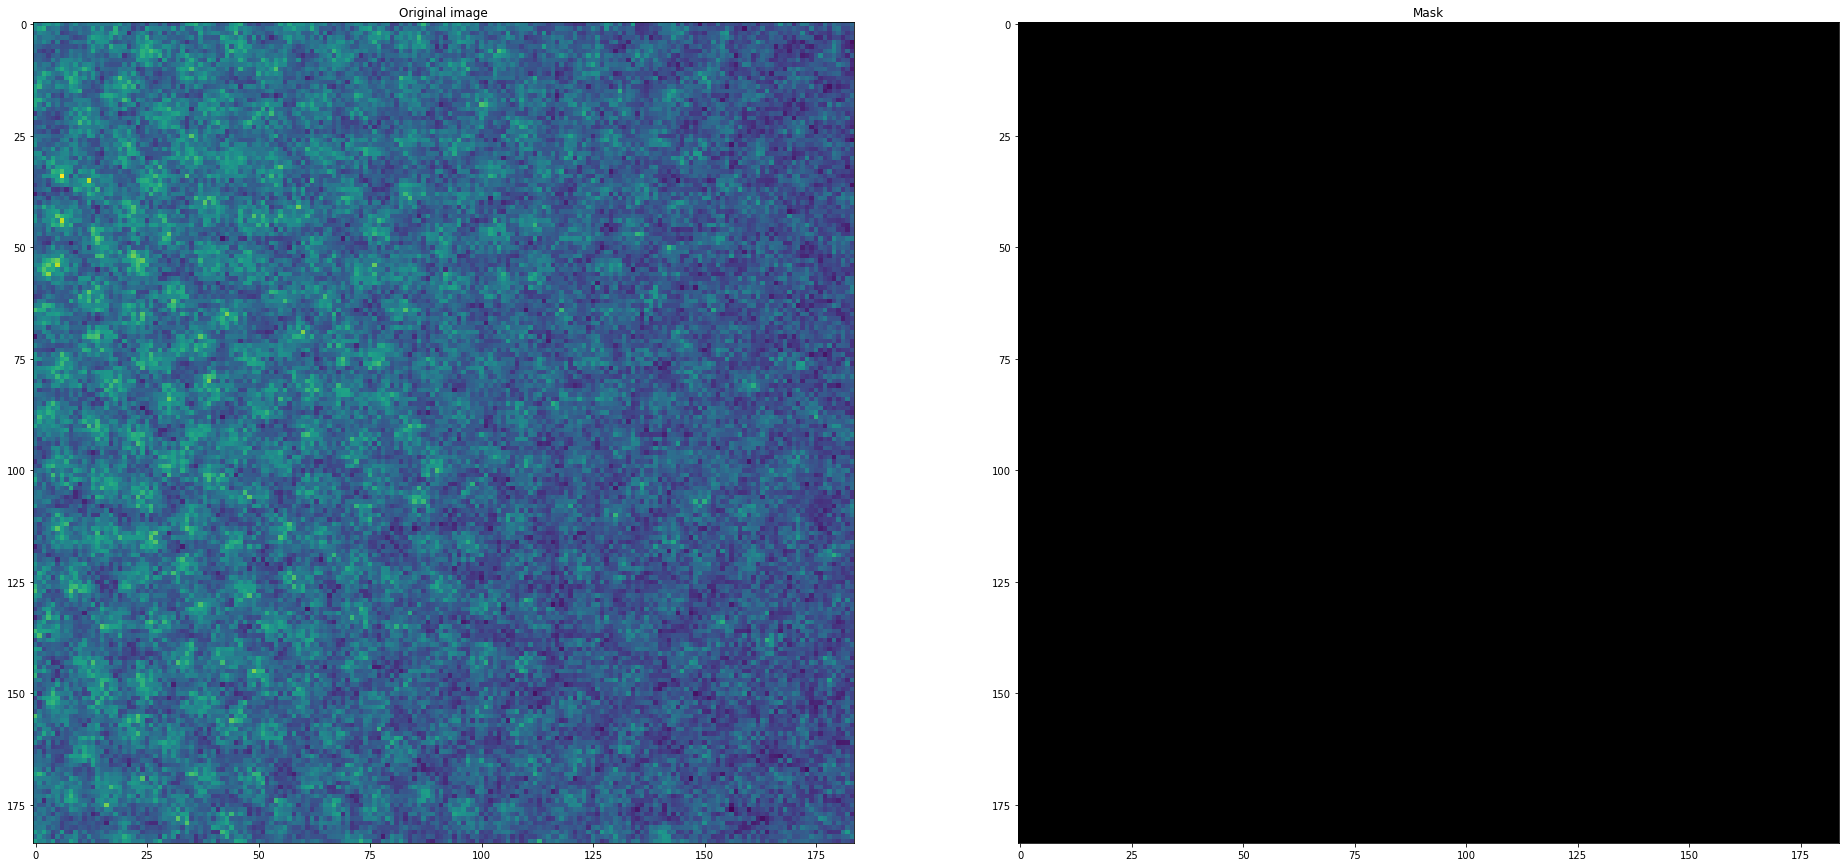

In [17]:

fig = plt.figure(figsize=(50,150))
ax1=fig.add_subplot(1,3,1)
ax1.imshow(DAPI_cropped)
ax1.set_title('Original image')

ax2=fig.add_subplot(1,3,2)
ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')



In [ ]:
ax3=fig.add_subplot(1,3,3)
ax3.imshow(segmentation.mark_boundaries(DAPI_cropped, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

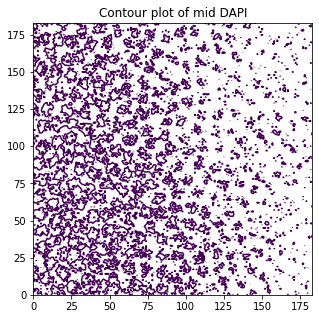

array([0.75, 1.2 ])

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(histogram, levels=[.75, 1.2])
ax.set_title('Contour plot of mid DAPI')
plt.show()

qcs.levels